In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential, load_model, Model
from keras.utils.np_utils import to_categorical

In [49]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
Y_train[0]

5

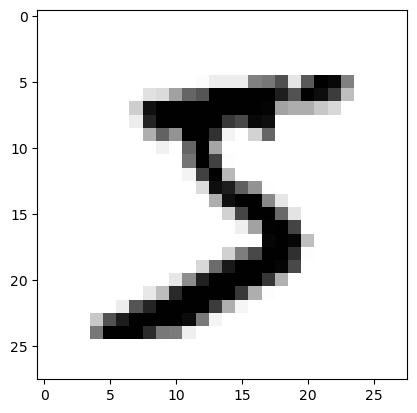

In [50]:
plt.imshow(X_train[0], cmap='binary')

In [51]:
X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(-1, 28, 28, 1)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [71]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='valid', strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 36)          14436     
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               295040    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [72]:
model.fit(X_train, Y_train, batch_size=200, epochs=1, validation_split=0.2)

240/240 [==============================] - 13s 49ms/step - loss: 0.2761 - acc: 0.9194 - val_loss: 0.1001 - val_acc: 0.9706


In [73]:
score = model.evaluate(X_test, Y_test)
print(score)

313/313 [==============================] - 3s 9ms/step - loss: 0.0788 - acc: 0.9748
[0.07879618555307388, 0.9747999906539917]


In [80]:
l1 = model.get_layer('conv2d_8')
l1.get_weights()[0].shape
# (5, 5, 1, 16)
# (16, 5, 5, 1)


(5, 5, 1, 16)

In [81]:
def plot_weight(w):
    w_min = np.min(w)
    w_max = np.max(w)
    
    num_grid = math.ceil(math.sqrt(w.shape[3]))
    fix, axis = plt.subplots(num_grid, num_grid)
    
    for i, ax in enumerate(axis.flat):
        if i < w.shape[3]:
            img = w[:,:,0,i]
            ax.imshow(img, vmin=w_min, vmax=w_max)
            
        ax:set_xticks([])
        ax:set_yticks([])
    plt.show()

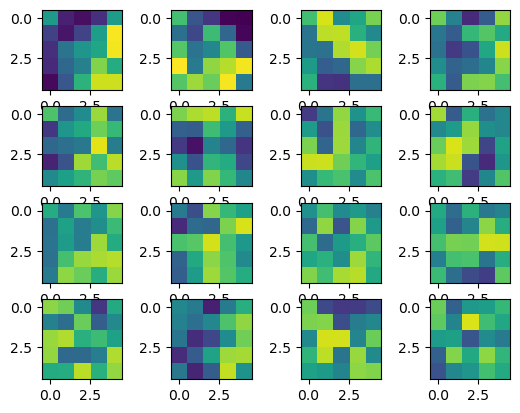

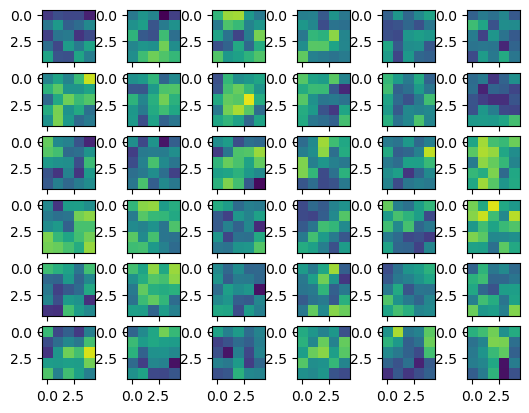

In [82]:
l1 = model.get_layer('conv2d_8')
w1 = l1.get_weights()[0]
plot_weight(w1)

l2 = model.get_layer('conv2d_9')
w2 = l2.get_weights()[0]
plot_weight(w2)

In [85]:
temp_model = Model(inputs=model.get_layer('conv2d_8').input, outputs=model.get_layer('conv2d_9').output)
output = temp_model.predict(X_test)


313/313 [==============================] - 2s 7ms/step


In [91]:
output.shape

(10000, 8, 8, 36)

In [92]:

def plot_output(output):
    
    num_grid = math.ceil(math.sqrt(output.shape[3]))
    fix, axis = plt.subplots(num_grid, num_grid)
    
    for i, ax in enumerate(axis.flat):
        if i < output.shape[3]:
            img = output[0,:,:,i]
            ax.imshow(img, cmap='binary')
            
        ax:set_xticks([])
        ax:set_yticks([])
    plt.show()

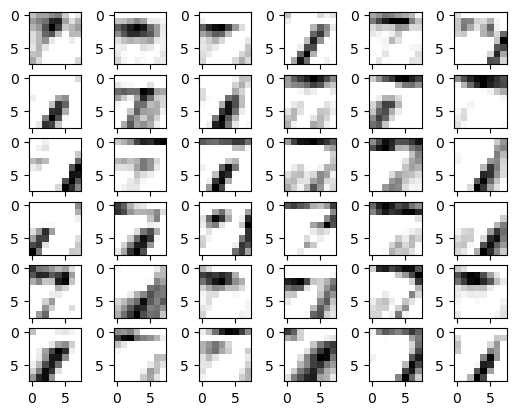

In [94]:
plot_output(output)